In [ ]:
!pip install pcntoolkit

In [ ]:
# Load all necessary python libraries
import pandas as pd
import pcntoolkit as pcn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stats

## Background Story

Morten and Ingrid are concerned about the health of their father, Nordan. He recently turned 65 years. A few months ago his speech became a bit disorganized. Recently, he could not remember the name of his two grandchildren. Together, they visit a neurologist/psychiatrist to conduct a number of 	cognitive tests. However, those tests were inconclusive, while Nordan had a relatively low IQ of 74 points, it could not explain his problems.

Recently, the family heard about a new screening technique called normative modeling with which one can place individuals in reference to a population norm on for instance measures such as brain volume. Nordan would like to undertake this procedure to better know what is going on and to potentially find targets for treatment. Therefore, the family booked an appointment with you, the normative modeling specialist. You conduct a brain scan of the hippocampus. 

_______________________________________________________________________________

**TASK 1:** You have four files. The feature and demographics file for the normsample and two files of the same name for Nordan your test sample. As one of your coworkers has done the preporcessing and quality control for the data for you, there are more subjects in the demographics file than in the feature file of the norm sample. Please select the overlap of participants between those two files. 

In [ ]:
!wget -nc https://raw.githubusercontent.com/saigerutherford/CPC_2020/master/data/cpc_camcan_demographics.csv

In [ ]:
!wget -nc https://raw.githubusercontent.com/saigerutherford/CPC_2020/master/data/cpc_camcan_features.csv

In [ ]:
!wget -nc https://raw.githubusercontent.com/saigerutherford/CPC_2020/master/data/cpc_camcan_demographics_nordan.csv

In [ ]:
!wget -nc https://raw.githubusercontent.com/saigerutherford/CPC_2020/master/data/cpc_camcan_features_nordan.csv

In [13]:
demo = pd.read_csv('cpc_camcan_demographics.csv')
nordan_demo = pd.read_csv('cpc_camcan_demographics_nordan.csv')

In [14]:
features = pd.read_csv('cpc_camcan_features.csv')
nordan_features = pd.read_csv('cpc_camcan_features_nordan.csv')

In [15]:
demo.columns

Index(['paricipants', 'age', 'sex_name', 'sex', 'IQ_random'], dtype='object')

<function matplotlib.pyplot.show>

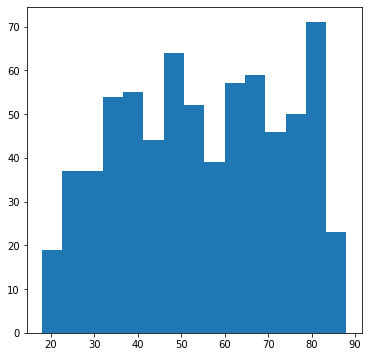

In [20]:
plt.figure(figsize=(6,6))
plt.hist(demo['age'],bins=15)
plt.show

<function matplotlib.pyplot.show>

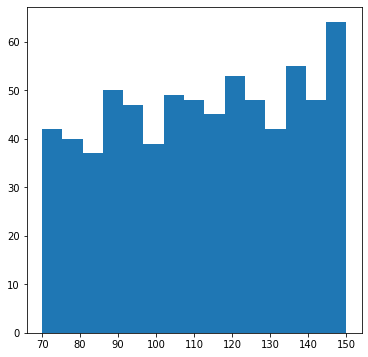

In [22]:
plt.figure(figsize=(6,6))
plt.hist(demo['IQ_random'],bins=15)
plt.show

In [16]:
demo.describe()

,age,sex,IQ_random
count,707.000000,707.000000,707.000000
mean,54.595474,1.506365,111.980198
std,18.602686,0.500313,23.305026
min,18.000000,1.000000,70.000000
25%,39.000000,1.000000,92.000000
50%,55.000000,2.000000,113.000000
75%,71.000000,2.000000,132.500000
max,88.000000,2.000000,150.000000


In [11]:
features.columns

Index(['participants', 'left_Hippocampal_tail', 'left_subiculum', 'left_CA1',
       'left_hippocampal-fissure', 'left_presubiculum', 'left_parasubiculum',
       'left_molecular_layer_HP', 'left_GC-ML-DG', 'left_CA3', 'left_CA4',
       'left_fimbria', 'left_HATA', 'left_Whole_hippocampus',
       'right_Hippocampal_tail', 'right_subiculum', 'right_CA1',
       'right_hippocampal-fissure', 'right_presubiculum',
       'right_parasubiculum', 'right_molecular_layer_HP', 'right_GC-ML-DG',
       'right_CA3', 'right_CA4', 'right_fimbria', 'right_HATA',
       'right_Whole_hippocampus'],
      dtype='object')

In [9]:
features.describe()

,left_Hippocampal_tail,left_subiculum,left_CA1,left_hippocampal-fissure,left_presubiculum,left_parasubiculum,left_molecular_layer_HP,left_GC-ML-DG,left_CA3,left_CA4,left_fimbria,left_HATA,left_Whole_hippocampus,right_Hippocampal_tail,right_subiculum,right_CA1,right_hippocampal-fissure,right_presubiculum,right_parasubiculum,right_molecular_layer_HP,right_GC-ML-DG,right_CA3,right_CA4,right_fimbria,right_HATA,right_Whole_hippocampus
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,502.277252,432.425231,621.910828,152.338600,298.826492,59.730948,564.243836,299.076785,215.588247,257.426315,88.465287,64.388535,3404.359756,553.113700,424.440076,653.238989,155.580676,288.393305,57.044034,576.830721,305.040063,229.539673,264.144928,73.589519,60.312769,3485.687776
std,93.507300,66.556883,95.601905,30.226531,48.828304,12.580865,84.927281,46.437514,37.053571,38.969917,24.214625,12.217508,498.431472,96.376912,61.729986,95.378187,33.546995,46.070202,11.264046,82.417205,44.970861,36.669340,37.732467,23.003738,10.090635,479.476766
min,285.214328,221.912109,384.131534,84.981375,153.973136,28.720430,312.162318,159.423991,99.665480,131.771325,7.951922,30.124935,2020.186431,322.444653,247.709136,425.265302,89.314336,154.440860,24.614143,355.028716,193.694755,141.440313,173.509703,8.642510,28.999134,2178.259602
25%,440.888820,392.810811,556.343306,130.623112,268.761238,50.841179,506.050551,268.777567,191.542229,233.231070,74.371888,56.611388,3092.439083,489.130268,385.136735,589.542233,131.395737,259.329588,49.673672,525.141444,277.022286,205.622777,240.960352,59.696945,53.950610,3186.892075
50%,493.101612,430.893974,619.752093,148.657028,300.881793,59.224334,565.424031,297.274436,212.122969,254.582181,89.525439,64.196277,3421.053035,542.141029,421.826796,647.876490,151.152773,287.793717,56.437363,573.487621,304.791997,228.231805,263.097624,73.593598,60.179301,3454.117625
75%,554.331713,473.663048,677.321831,169.124380,329.716408,67.839621,616.111150,326.964724,236.836291,281.160726,103.389986,71.265011,3702.435725,610.594812,459.109002,712.488079,175.330252,314.157212,63.767960,628.188247,331.212284,250.833280,286.248451,88.187133,66.091885,3783.090597
max,1554.463301,1076.422978,1704.756416,413.115461,691.382539,114.925973,1392.890663,735.478590,524.444241,632.443843,197.307186,114.130946,8738.646677,1310.109005,1046.296874,1591.478773,401.136974,726.340082,107.190148,1376.982256,746.277370,558.827465,641.978384,228.291674,129.979982,8463.752014


In [27]:
demo_features = pd.merge(demo, features, on='participants', how='inner')

In [26]:
demo.rename(columns={"paricipants": "participants"}, inplace=True)

In [28]:
len(demo_features)

650

In [32]:
demo_train = demo_features.iloc[:, 0:4]
#features_train = demo_features.iloc[:,5:] #selects all the hippocampus features
features_train = demo_features[['left_Whole_hippocampus', 'right_Whole_hippocampus']] # select only a few features

**TASK 2:** Prepare the covariate_normsample and testresponse_normsample file. As mentioned in the introductory presentation those files need a specific format and the entries need to be seperated by spaces. Use whatever method you know to prepare those files based on the data provided in TASK 1. Save those files in .txt format and as mentioned earlier seperate each entry by a space. Also get rid of the column names and subject IDs.

In [34]:
demo_train.to_csv(r'demo_train.txt', header=None, index=None, sep=' ', mode='a')
features_train.to_csv(r'features_train.txt', header=None, index=None, sep=' ', mode='a')
nordan_demo.to_csv(r'demo_test.txt', header=None, index=None, sep=' ', mode='a')
nordan_features.to_csv(r'features_test.txt', header=None, index=None, sep=' ', mode='a')

**TASK 3:** Once you have prepared all the necessary files. Look at the pcntoolkit for running normative modeling. Select an appropriate method, set up the toolkit, and run your analyses using 10-fold cross validation in the normsample only. HINT: You primarily need the estimate function and it might be useful to select only two regions of the hippocampus as the computations might take too long otherwise. Base your choice on your prior knowlege of the hippocampus and its involvement in memory processes.

In [ ]:
pcntoolkit.normative_parallel.execute_nm(processing_dir, 
                                     python_path, 
                                     normative_path, 
                                     job_name, 
                                     covfile_path, 
                                     respfile_path, 
                                     batch_size, 
                                     memory, 
                                     duration,
                                     testcovfile_path = testcovfile_path,
                                     testrespfile_path = testrespfile_path
                                     )

**TASK 4:** In order to visualize the normative trajectories, you first need to run the forward model. To this end you need to set up an appropriate covariate_forwardmodel file. Then you can input the files you made in TASK 1 as well as the file you made now and run the forward model using the appropriate specifications.

In [ ]:
#CODE HERE

**TASK 5:** Visualize the forward model by plotting $\hat{Y}$ of all hippocampal structures as a function of age. Use the 95% confidence interval to plot Ystd around it.

In [ ]:
#CODE HERE

**TASK 6:** Apply the normative model to Nordan's brain.

In [ ]:
#CODE HERE

**TASK 7:** Plot Nordan's brain in reference to the estimated and visualized models for the hippocampal structure(s) as well as his cognitive scores.

In [ ]:
#CODE HERE

**EXTRA TASK 8:** Sort all participants on their cognitive test performance and compare the number of extreme positive and extreme negative deviations per participants in the best and worse 10% statistically, based on a threshold for extreme deviations of |Z|= 1.96.

In [ ]:
#CODE HERE

**EXTRA TASK 9:** Plot how the number and the statistical comparison of extreme positive and extreme negative deviations in both groups changes as a function of adjusting the threshold dynamically from |Z|= 1.96. to |Z| = 10.

In [ ]:
#CODE HERE